In [2]:
import torch

from PIL import Image
from torchvision import transforms

from pytorch_pretrained_vit import ViT

import json


In [3]:
img_path = './static/cafe.png'

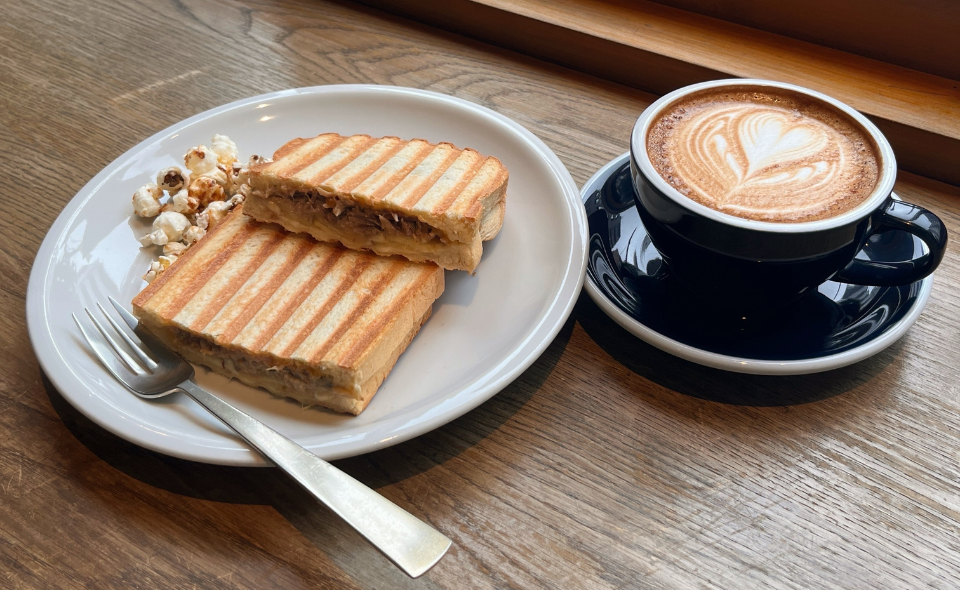

In [19]:
img = Image.open(img_path).convert("RGB")
img

In [9]:
model = ViT('B_16_imagenet1k', pretrained=True)

Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to C:\Users\chart/.cache\torch\hub\checkpoints\B_16_imagenet1k.pth


100.0%


Loaded pretrained weights.


In [16]:
model.image_size

(384, 384)

In [20]:
tfms = transforms.Compose([
	transforms.Resize(model.image_size),
	transforms.ToTensor(),
	transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5],)
])
img = tfms(img)
img

tensor([[[ 0.0980,  0.0902,  0.1216,  ..., -0.4980, -0.4980, -0.5059],
         [ 0.0902,  0.0980,  0.1137,  ..., -0.4980, -0.4980, -0.5059],
         [ 0.0667,  0.0902,  0.1608,  ..., -0.4902, -0.4902, -0.4980],
         ...,
         [-0.0275, -0.0824, -0.0745,  ...,  0.5529,  0.4745,  0.5137],
         [ 0.0275,  0.0824, -0.0902,  ...,  0.6314,  0.4745,  0.4353],
         [-0.0118,  0.1059,  0.0510,  ...,  0.6471,  0.6078,  0.5137]],

        [[-0.0431, -0.0510, -0.0196,  ..., -0.7333, -0.7333, -0.7412],
         [-0.0510, -0.0431, -0.0275,  ..., -0.7333, -0.7333, -0.7412],
         [-0.0745, -0.0510,  0.0196,  ..., -0.7255, -0.7255, -0.7333],
         ...,
         [-0.2471, -0.3020, -0.2941,  ...,  0.5529,  0.4510,  0.5059],
         [-0.2078, -0.1529, -0.3098,  ...,  0.6314,  0.4588,  0.4275],
         [-0.2549, -0.1373, -0.1686,  ...,  0.6471,  0.6078,  0.5059]],

        [[-0.2000, -0.2078, -0.1765,  ..., -0.8196, -0.8196, -0.8275],
         [-0.2078, -0.2000, -0.1843,  ..., -0

In [24]:
transforms.Normalize?

Init signature: transforms.Normalize(mean, std, inplace=False)
Docstring:     
Normalize a tensor image with mean and standard deviation.
This transform does not support PIL Image.
Given mean: ``(mean[1],...,mean[n])`` and std: ``(std[1],..,std[n])`` for ``n``
channels, this transform will normalize each channel of the input
``torch.*Tensor`` i.e.,
``output[channel] = (input[channel] - mean[channel]) / std[channel]``

.. note::
    This transform acts out of place, i.e., it does not mutate the input tensor.

Args:
    mean (sequence): Sequence of means for each channel.
    std (sequence): Sequence of standard deviations for each channel.
    inplace(bool,optional): Bool to make this operation in-place.
Init docstring: Initialize internal Module state, shared by both nn.Module and ScriptModule.
File:           c:\users\chart\anaconda3\envs\conda-env\lib\site-packages\torchvision\transforms\transforms.py
Type:           type
Subclasses:     

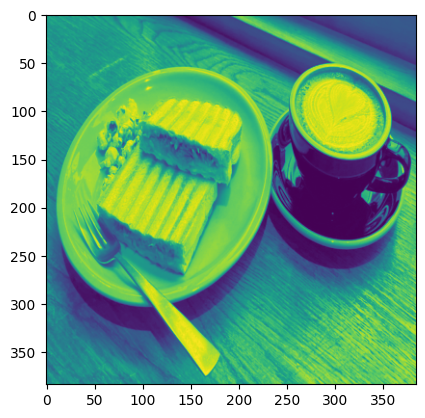

In [23]:
import matplotlib.pyplot as plt

plt.imshow(img[0].view(384,384))
plt.show()

In [26]:
img.shape

torch.Size([3, 384, 384])

In [27]:
img = img.unsqueeze(0)

In [28]:
with torch.no_grad():
	outputs = model(img).squeeze(0)

In [37]:
pred = torch.argmax(outputs)
pred

tensor(967)

In [32]:
labels_map = json.load(open('labels_map.txt'))

In [33]:
labels_map = [labels_map[key] for key in labels_map]

In [36]:
labels_map[pred]

'espresso'